<a href="https://colab.research.google.com/github/geophase/Quantum_Simulators_MSc/blob/main/SimulationManyBodySystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fock Basis 


In [ ]:
import numpy as np
from scipy.linalg import eigh
import math as mt
import matplotlib.pyplot as py

In [ ]:
Fock0=[np.array([3,0,0,0,0,0,0])];
Fock1=[np.array([2,1,0,0,0,0,0])];
Fock2=[np.array([2,0,1,0,0,0,0]),np.array([1,2,0,0,0,0,0])];
Fock3=[np.array([2,0,0,1,0,0,0]),np.array([0,3,0,0,0,0,0]),np.array([1,1,1,0,0,0,0])];
Fock4=[np.array([2,0,0,0,1,0,0]),np.array([1,0,2,0,0,0,0]),np.array([0,2,1,0,0,0,0]),np.array([1,1,0,1,0,0,0])];
Fock5=[np.array([2,0,0,0,0,1,0]),np.array([1,0,1,1,0,0,0]),np.array([1,1,0,0,1,0,0]),np.array([0,1,2,0,0,0,0]),np.array([0,2,0,1,0,0,0])];
Fock6=[np.array([2,0,0,0,0,0,1]),np.array([0,0,3,0,0,0,0]),np.array([1,1,0,0,0,1,0]),np.array([0,1,1,1,0,0,0]),np.array([1,0,1,0,1,0,0]),np.array([1,0,0,2,0,0,0]),np.array([0,2,0,0,1,0,0])];
Base=[Fock2,Fock3,Fock4,Fock5,Fock6]

In [ ]:
def angmom(ket):
  'Function to calculate L of a given Fock vector'
  L=0;
  for k in range(len(ket)): 
    L=L+k*ket[k]
  return L

# Operators

In [ ]:
def creation(ket,k):
   v=np.copy(ket);
   rc= np.sqrt(v[k]+1);
   v[k]=v[k]+1;
   if sum(v)>3:
     return [0.,ket]
   else: 
    return [rc,v]

def annihilation(ket,k):
  v=np.copy(ket);
  if v[k]==0:
    return [0.,ket]
  else:
    ra= np.sqrt(v[k]);
    v[k]=v[k]-1;
    return [ra,v]

def braket(bra,ket):
  v1=bra;
  v2=ket;
  if np.array_equal(v1,v2):
    return 1
  else:
    return 0


# Hamiltonian
 

In [ ]:
def HNI(bra,ket,L,w):
  "Function that compute the matrix element <bra|H|ket> where H is the non-interaction part"

  def Hsp(w,k):
    return 1+k*(1-w)

  w=w;
  g2d=1;
  bra0=bra;
  ket0=ket;
  H=0;
  if np.array_equal(bra0,ket0):
    for k in range(L+1):
      f=Hsp(w,k);
      H=H+f*ket[k];
    return H
  else: 
    return 0

def VI(bra,ket,L,g2D):
  "Function that compute the matrix element <bra|V|ket> where V is the interaction part"
  g2D=g2D;
  L=L;
  ket0=ket;
  #print(ket0)
  bra0=bra;

  def I(k,l,p,q):
    div=2*np.pi*np.sqrt(mt.factorial(k)*mt.factorial(l)*mt.factorial(p)*mt.factorial(q))*2**(k+l);
    return mt.factorial(k+l)/div*dkronocker(0,k+l-p-q)

  Vint=0;
  for k in range(L+1):
    for l in range(L+1):
      for p in range(L+1):
        for q in range(L+1):
          ket0=ket;
          #print(k,l,p,q)
          if k+l!=p+q:
            Vint=Vint
          else:
            [r1,ket1]=annihilation(ket0,k);
            [r2,ket2]=annihilation(ket1,l);      
            [r3,ket3]=creation(ket2,p);   
            [r4,ket4]=creation(ket3,q);
            Vint=Vint+g2D*I(k,l,p,q)*r1*r2*r3*r4*braket(bra0,ket4)*0.5;
  return Vint

def He(FockL,g2d,w):
  'Construction of the matrices for each element of the base'
  d=len(FockL);
  L=angmom(FockL[0]);
  i=0;
  j=0;
  H=np.zeros([d,d]); 
  for bra in FockL:
    j=0;
    for ket in FockL:
      H[i,j]=HNI(bra,ket,L,w)+VI(bra,ket,L,g2d);
      j+=1
    i+=1 
 
  return H 


# Diagonalization

In [ ]:
def groundstate(Base,g2D,w):
  'Function that obtain the ground state and correspondant eigenvalue of the hamiltonian'
  'for each element of the Base'
  g2D=g2D;
  w=w;
  eL=np.zeros(len(Base));
  gL=list();
  for i in range(len(Base)):
    FockL=Base[i];
    #print(FockL,i)
    H=He(FockL,g2D,w);
    [e,g]=eigh(H);
    eL[i]=e[0];
    #print(e,e[0],eL[i])
    gL.append(g[0]);
  return eL,gL


Text(0, 0.5, 'E')

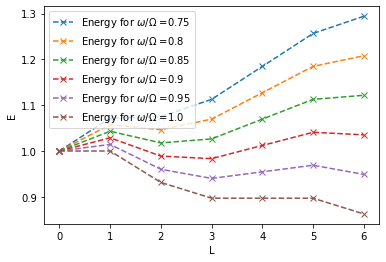

In [ ]:
w=np.linspace(0.75,1,6)
g2D=1;
L=[0,1,2,3,4,5,6]
fig, ax = py.subplots()
for w in w:
  e0=He(Fock0,1,w)[0];
  e1=He(Fock1,1,w)[0];
  [e,g]=groundstate(Base,1,w)
  E=np.concatenate([np.array([e0[0],e1[0]]),e]);
  ws=str(w);
  ax.plot(L,E/e0,'x--',label='Energy for $\omega/\Omega$ ='+ws)
ax.legend()
ax.set_title('')
ax.set_xlabel('L')
ax.set_ylabel('E')